In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supaya visualisasi lebih bagus
sns.set(style="whitegrid")

# Load dataset
df = pd.read_csv('/content/bmw.csv')

# Tampilkan beberapa data teratas
df.head()


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [ ]:
# Informasi yang ada pada dataset
df.info()

# Deskripsi statik yang ada pada datset
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


,year,price,mileage,tax,mpg,engineSize
count,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000
mean,2017.078935,22733.408867,25496.986550,131.702068,56.399035,2.167767
std,2.349038,11415.528189,25143.192559,61.510755,31.336958,0.552054
min,1996.000000,1200.000000,1.000000,0.000000,5.500000,0.000000
25%,2016.000000,14950.000000,5529.000000,135.000000,45.600000,2.000000
50%,2017.000000,20462.000000,18347.000000,145.000000,53.300000,2.000000
75%,2019.000000,27940.000000,38206.000000,145.000000,62.800000,2.000000
max,2020.000000,123456.000000,214000.000000,580.000000,470.800000,6.600000


In [ ]:
#Data Cleaning
df.isnull().sum()

,0
model,0
year,0
price,0
transmission,0
mileage,0
fuelType,0
tax,0
mpg,0
engineSize,0


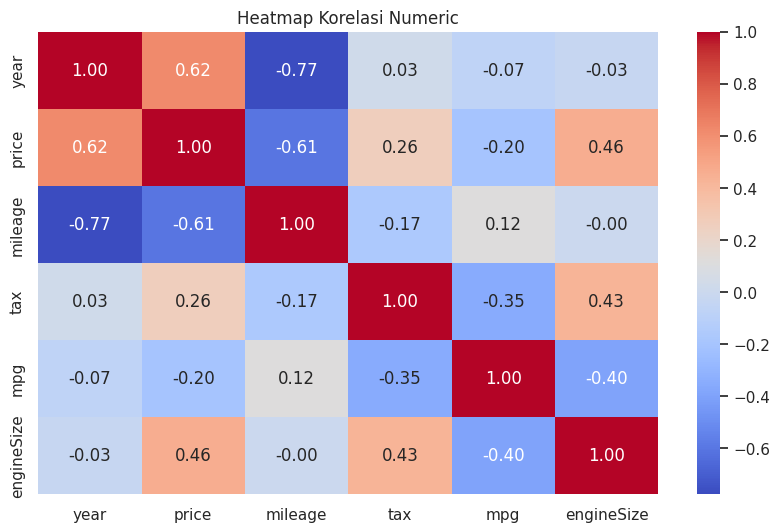

In [ ]:
#heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Numeric')
plt.show()


/tmp/ipython-input-40-1224321786.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_models.index, y=top_models.values, palette="viridis")


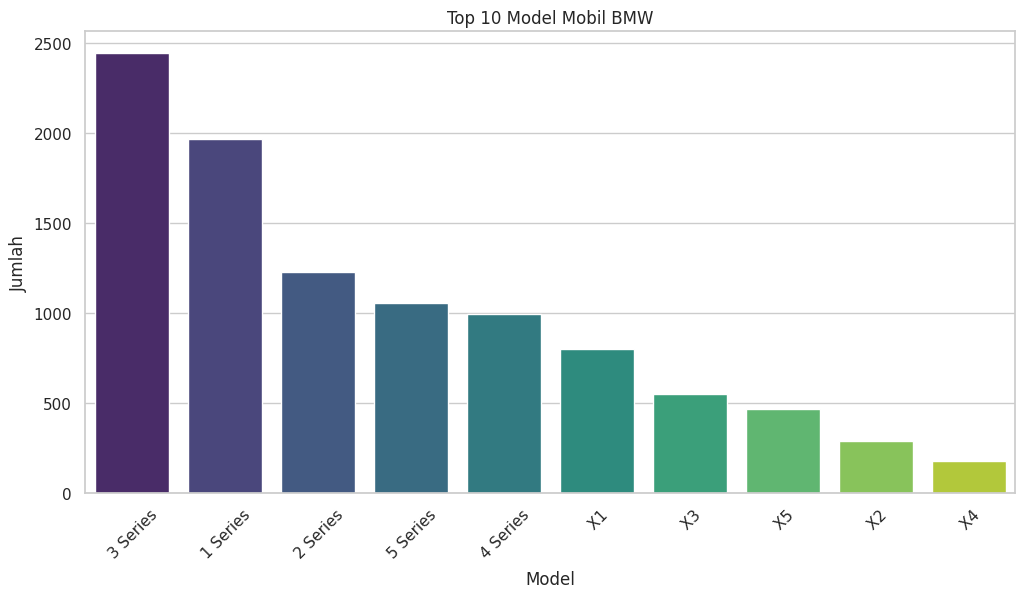

In [ ]:
#barchart
plt.figure(figsize=(12,6))
top_models = df['model'].value_counts().nlargest(10)
sns.barplot(x=top_models.index, y=top_models.values, palette="viridis")
plt.title('Top 10 Model Mobil BMW')
plt.xlabel('Model')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()


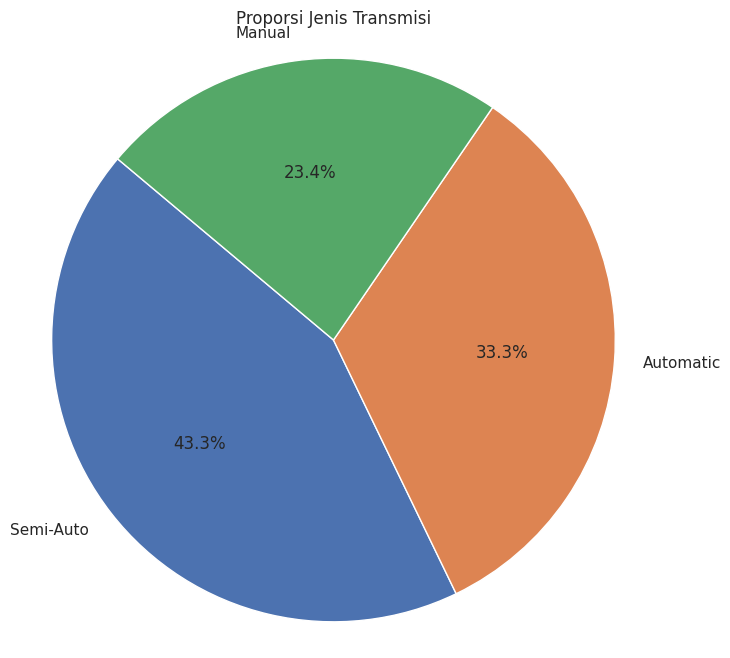

In [ ]:
#piechart
plt.figure(figsize=(8,8))
transmission_counts = df['transmission'].value_counts()
plt.pie(transmission_counts, labels=transmission_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proporsi Jenis Transmisi')
plt.axis('equal')
plt.show()


/tmp/ipython-input-42-863153732.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='fuelType', y='price', palette='Set2')


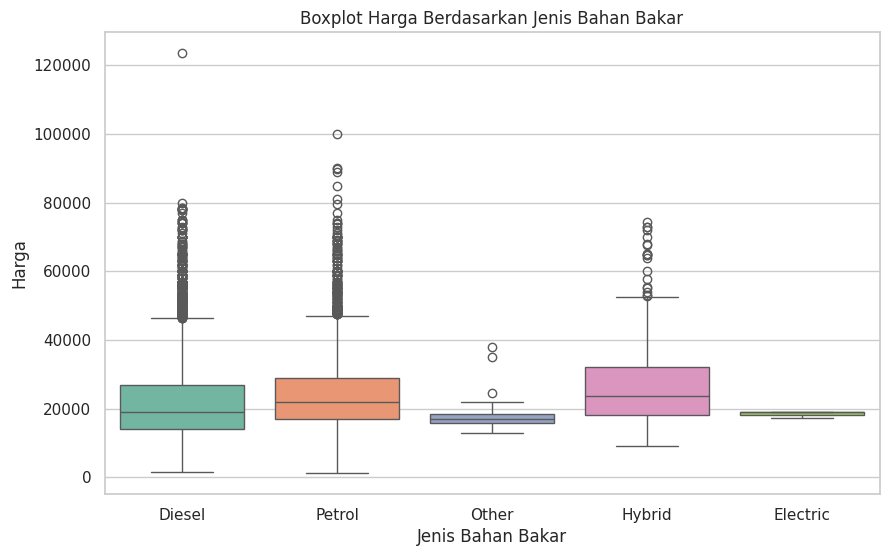

In [ ]:
#boxplot
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='fuelType', y='price', palette='Set2')
plt.title('Boxplot Harga Berdasarkan Jenis Bahan Bakar')
plt.xlabel('Jenis Bahan Bakar')
plt.ylabel('Harga')
plt.show()


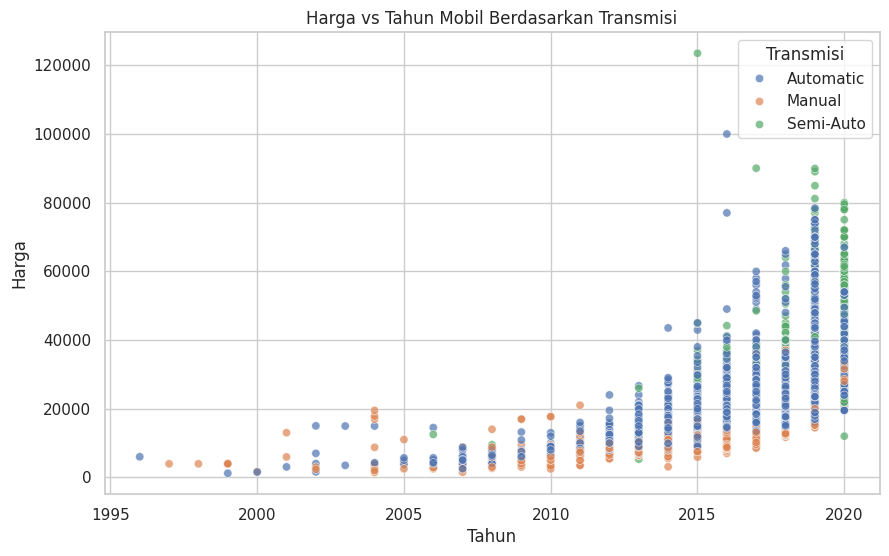

In [ ]:
#Scatterplot
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='year', y='price', hue='transmission', alpha=0.7)
plt.title('Harga vs Tahun Mobil Berdasarkan Transmisi')
plt.xlabel('Tahun')
plt.ylabel('Harga')
plt.legend(title='Transmisi')
plt.show()


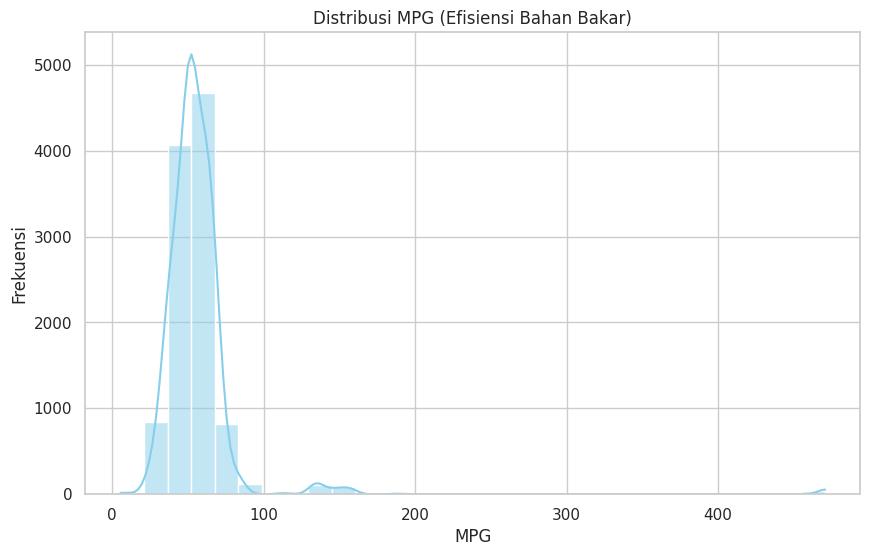

In [ ]:
#Histogram
plt.figure(figsize=(10,6))
sns.histplot(df['mpg'], bins=30, kde=True, color='skyblue')
plt.title('Distribusi MPG (Efisiensi Bahan Bakar)')
plt.xlabel('MPG')
plt.ylabel('Frekuensi')
plt.show()


/tmp/ipython-input-45-1965650078.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['model'].isin(top5_models)], x='model', y='mileage', palette='cool')


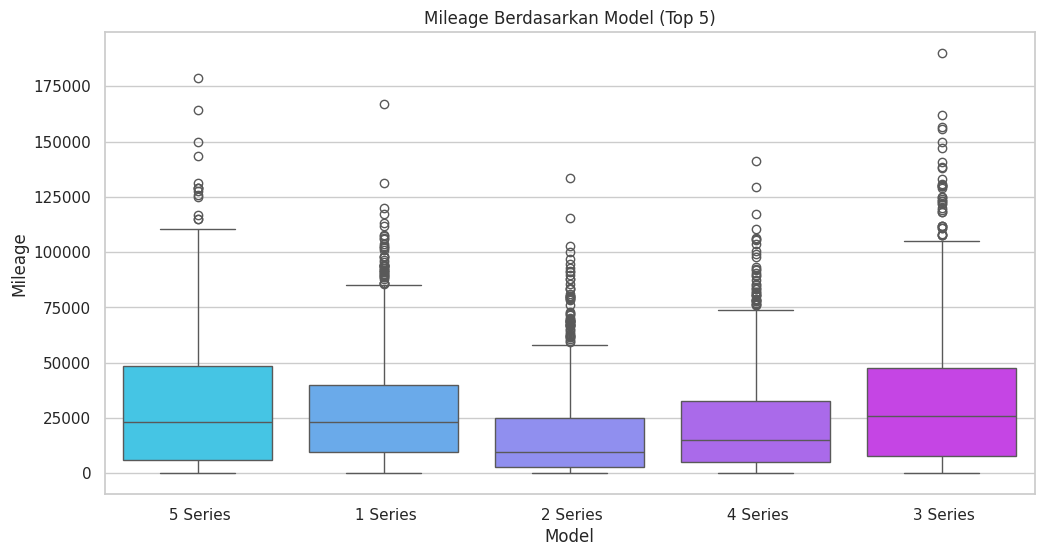

In [ ]:
#boxplot
top5_models = df['model'].value_counts().nlargest(5).index
plt.figure(figsize=(12,6))
sns.boxplot(data=df[df['model'].isin(top5_models)], x='model', y='mileage', palette='cool')
plt.title('Mileage Berdasarkan Model (Top 5)')
plt.xlabel('Model')
plt.ylabel('Mileage')
plt.show()


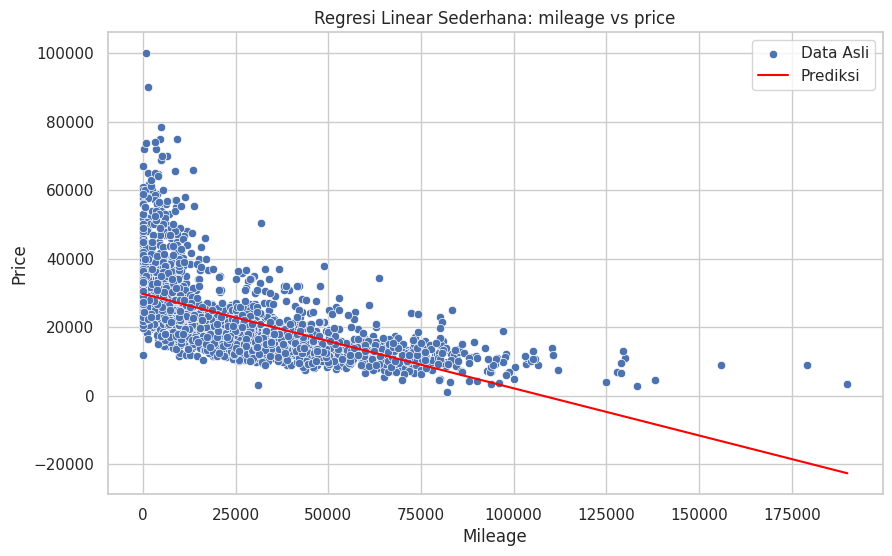

R2 Score: 0.35960719990157064
MSE: 82812397.75006472


In [ ]:
#regresi linear sederhana
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Variabel sederhana
X = df[['mileage']]
y = df['price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = LinearRegression()
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Visualisasi hasil
plt.figure(figsize=(10,6))
sns.scatterplot(x=X_test['mileage'], y=y_test, label='Data Asli')
sns.lineplot(x=X_test['mileage'], y=y_pred, color='red', label='Prediksi')
plt.title('Regresi Linear Sederhana: mileage vs price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.legend()
plt.show()

# Evaluasi
print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


In [ ]:
#Uji-t, Uji-F, R², dan ringkasan OLS
import statsmodels.api as sm

# Siapkan data
X = df[['mileage']]
y = df['price']

# Tambahkan konstanta (intercept)
X_const = sm.add_constant(X)

# Fit model OLS
model_ols = sm.OLS(y, X_const).fit()

# Output summary
print(model_ols.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     6236.
Date:                Thu, 17 Jul 2025   Prob (F-statistic):               0.00
Time:                        11:06:37   Log-Likelihood:            -1.1356e+05
No. Observations:               10781   AIC:                         2.271e+05
Df Residuals:                   10779   BIC:                         2.271e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.974e+04    124.635    238.630      0.0

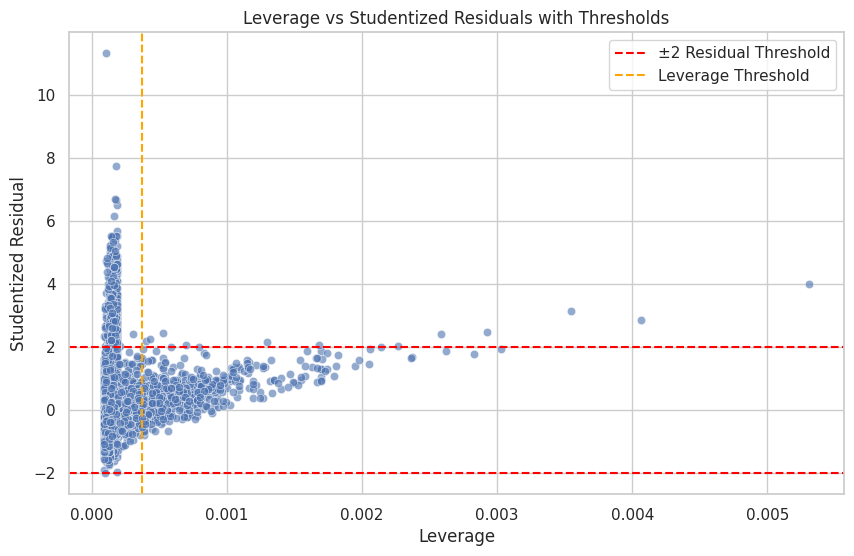

In [ ]:
#Leverage & Outlier
# X dan y
X = df[['mileage']]
y = df['price']

# Tambahkan konstanta
X_const = sm.add_constant(X)

# Fit model OLS
model_ols = sm.OLS(y, X_const).fit()

# Dapatkan leverage dan residual
influence = model_ols.get_influence()
leverage = influence.hat_matrix_diag
student_resid = influence.resid_studentized_internal

# Threshold untuk deteksi
leverage_threshold = 2 * (X_const.shape[1]) / len(X_const)
resid_threshold = 2

# Plot scatter
plt.figure(figsize=(10, 6))
sns.scatterplot(x=leverage, y=student_resid, alpha=0.6)

# Garis horizontal untuk residu
plt.axhline(y=resid_threshold, color='red', linestyle='--', label='±2 Residual Threshold')
plt.axhline(y=-resid_threshold, color='red', linestyle='--')

# Garis vertikal untuk leverage
plt.axvline(x=leverage_threshold, color='orange', linestyle='--', label='Leverage Threshold')

plt.xlabel('Leverage')
plt.ylabel('Studentized Residual')
plt.title('Leverage vs Studentized Residuals with Thresholds')
plt.legend()
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score, KFold

# K-Fold CV untuk R2
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=cv, scoring='r2')

print("R2 per Fold:", cv_scores)
print("Rata-rata R2:", cv_scores.mean())


R2 per Fold: [0.3596072  0.37890651 0.35946593 0.37965097 0.35336122]
Rata-rata R2: 0.3661983655446076


Regresi Linear Berganda
R2 Score: 0.656155758469465
MSE: 44464219.599782206


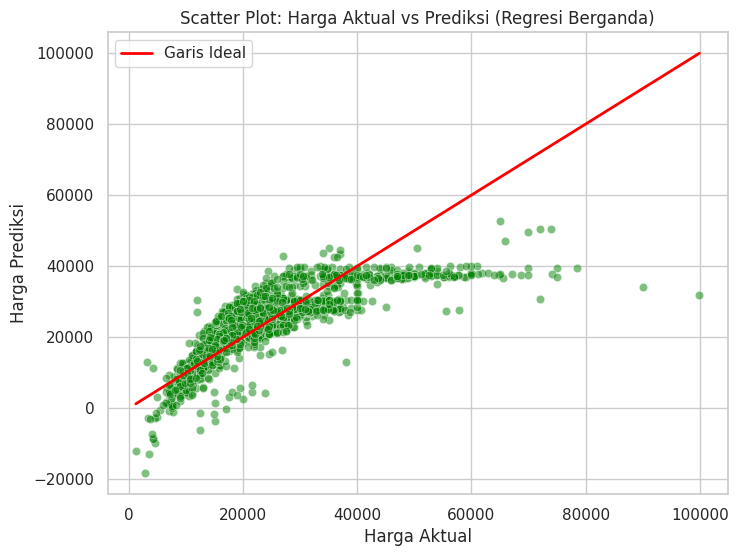

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     1954.
Date:                Thu, 17 Jul 2025   Prob (F-statistic):               0.00
Time:                        11:06:37   Log-Likelihood:            -1.1011e+05
No. Observations:               10781   AIC:                         2.202e+05
Df Residuals:                   10769   BIC:                         2.203e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -3.83

/tmp/ipython-input-50-1953988450.py:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = model_ols.params[0]


In [ ]:

# Encoding variabel kategorikal
df_encoded = pd.get_dummies(df, columns=['transmission', 'fuelType'], drop_first=True)

# Tentukan fitur dan target
features = ['year', 'mileage', 'mpg', 'tax', 'engineSize'] + \
           [col for col in df_encoded.columns if 'transmission_' in col or 'fuelType_' in col]

X = df_encoded[features]
y = df_encoded['price'].astype(float)  # Pastikan target numerik

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model LinearRegression (scikit-learn)
model_multi = LinearRegression()
model_multi.fit(X_train, y_train)
y_pred_multi = model_multi.predict(X_test)

# Evaluasi model
print("Regresi Linear Berganda")
print("R2 Score:", r2_score(y_test, y_pred_multi))
print("MSE:", mean_squared_error(y_test, y_pred_multi))

# Visualisasi prediksi vs aktual
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_multi, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Garis Ideal')
plt.title("Scatter Plot: Harga Aktual vs Prediksi (Regresi Berganda)")
plt.xlabel("Harga Aktual")
plt.ylabel("Harga Prediksi")
plt.legend()
plt.grid(True)
plt.show()

# Model OLS (statsmodels)
X_const = sm.add_constant(X).astype(float)  # Tambahkan intercept dan pastikan float
model_ols = sm.OLS(y, X_const).fit()
print(model_ols.summary())

#  Cetak koefisien & persamaan regresi
intercept = model_ols.params[0]
coefficients = model_ols.params[1:]

print("\nPersamaan Regresi Linear Berganda:")
regression_eq = f"price = {intercept:.2f}"
for feature, coef in coefficients.items():
    regression_eq += f" + ({coef:.2f} * {feature})"
print(regression_eq)


Korelasi Pearson (mileage vs price): -0.605, p-value: 0.000e+00


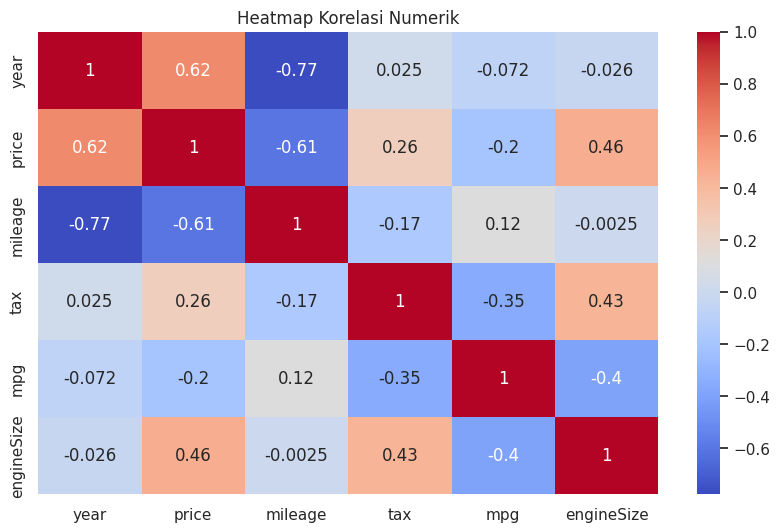

In [ ]:
#uji korelasi
from scipy.stats import pearsonr

# Korelasi Pearson contoh antara mileage dan price
corr, pval = pearsonr(df['mileage'], df['price'])
print(f"Korelasi Pearson (mileage vs price): {corr:.3f}, p-value: {pval:.3e}")

# Heatmap semua fitur numerik
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Numerik')
plt.show()


In [ ]:
#teoremabayes
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder

# Buat label harga
df['price_category'] = pd.cut(df['price'], bins=[0,15000,25000,100000], labels=['cheap','medium','expensive'])

# Encode kategori
df_encoded = pd.get_dummies(df, columns=['transmission', 'fuelType'], drop_first=True)
le = LabelEncoder()
y_bayes = le.fit_transform(df['price_category'])

# Fitur numerik dan dummies
X_bayes = df_encoded[['year','mileage','mpg','tax','engineSize'] + [col for col in df_encoded.columns if 'transmission_' in col or 'fuelType_' in col]]

# Split
X_train, X_test, y_train, y_test = train_test_split(X_bayes, y_bayes, test_size=0.2, random_state=42)

# Model
bayes = GaussianNB()
bayes.fit(X_train, y_train)

# Prediksi & Akurasi
acc = bayes.score(X_test, y_test)
print("Akurasi Teorema Bayes:", acc)


Akurasi Teorema Bayes: 0.674547983310153


In [ ]:
# Evaluasi Model Linier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


Mean Absolute Error (MAE): 22868.24
Mean Squared Error (MSE): 566067962.05
R-squared (R²): -877234970.67
